In [15]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

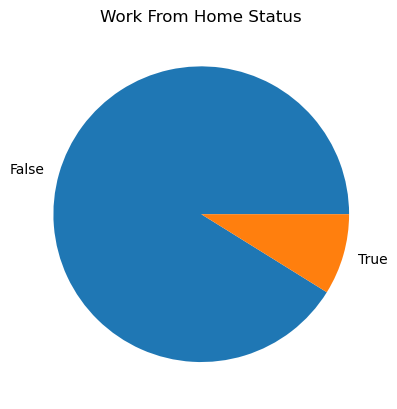

In [16]:
# See the work from home values in the data frame
df['job_work_from_home'].value_counts().plot(kind='pie')
plt.title('Work From Home Status')
plt.ylabel("")
plt.show()

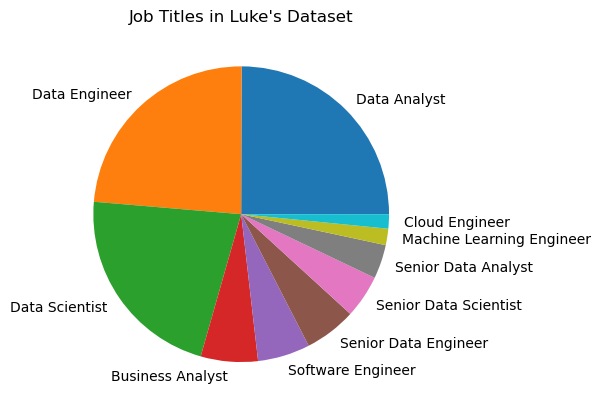

In [17]:
# See all the job titles within the data frame
df['job_title_short'].value_counts().plot(kind='pie')
plt.title("Job Titles in Luke's Dataset")
plt.ylabel("")
plt.show()

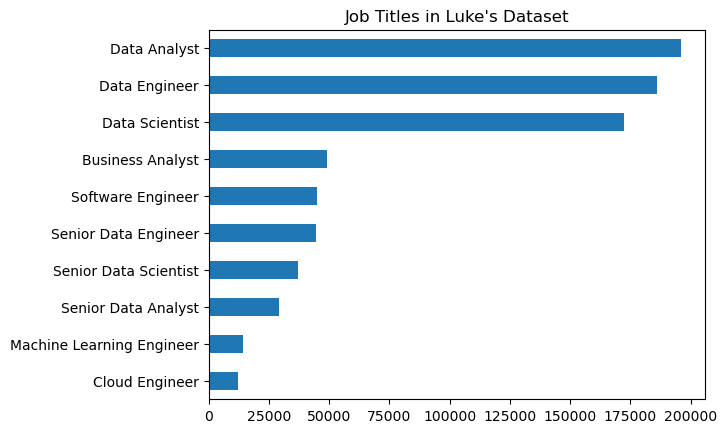

In [18]:
# Change prior viz to bar chart (better, as more than 2 variables will be hard to display in pie plot)
df['job_title_short'].value_counts().plot(kind='barh')
plt.title("Job Titles in Luke's Dataset")
plt.ylabel("")
plt.gca().invert_yaxis() # Do this to have it in descending order
plt.show()

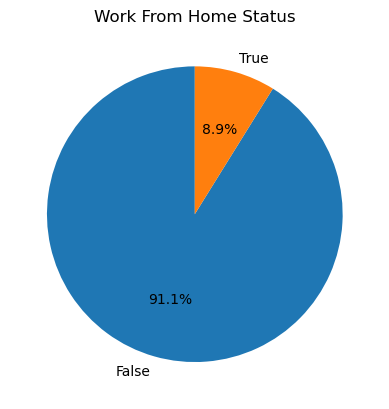

In [19]:
# Re-orient the pie plot for better visibility & include associated percentage for variables
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work From Home Status')
plt.ylabel("")
plt.show()

In [20]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


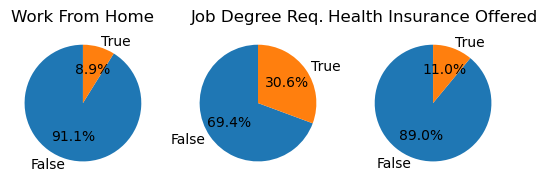

In [21]:
fig, ax = plt.subplots(1,3)


dict_column = {
    'job_work_from_home': "Work From Home",
    'job_no_degree_mention': "Job Degree Req.",
    'job_health_insurance': "Health Insurance Offered"
}
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()